In [1]:
print('halo')

halo


In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
!pip install paddlepaddle-gpu -q
!pip install paddleocr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.0/541.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 104.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install ultralytics  -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.4/614.4 kB 4.0 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import glob
import requests
from io import BytesIO
import os
from google.colab.patches import cv2_imshow

In [6]:
img_fns = glob.glob('/content/drive/MyDrive/Yolov8-LicensePlate/bg udh bg/eval_set_highreso/*.png')

In [7]:
def delete_files(directory):
    file_list = os.listdir(directory)
    for file_name in file_list:
        file_path = os.path.join(directory, file_name)
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Deleted file: {file_name}")


# Plate Detection Using Yolo

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
model_path = '/content/drive/MyDrive/Yolov8-LicensePlate/result_yolo/2_runs-xml-manual_3_bbox/detect/train/weights/best.pt'
# Load Model
model = YOLO(model_path)

In [10]:
img_fns = glob.glob('/content/drive/MyDrive/Yolov8-LicensePlate/bg udh bg/eval_set_highreso/*.png')

## Multiple Images

In [ ]:
# Buat Hapus Semua Files dalam directory
directory_path = '/content/drive/MyDrive/Yolov8-LicensePlate/output_predict/cropped_images_5'
delete_files(directory_path)

In [13]:
# Predict The Image

save_directory = '/content/drive/MyDrive/Yolov8-LicensePlate/output_predict/cropped_images_5'
FileName = []
filepath = []

orig_filename = []
filename_crop = []
file_class = []

for image_path in img_fns:
  result = model.predict(image_path)
  boxes = result[0].boxes.cpu().numpy()


  class_count = len(boxes.cls)
  if class_count != 0:
    filename = os.path.basename(image_path)
    FileName.append(filename)
    filepath.append(image_path)
    save_path_base = os.path.join(save_directory, filename.split('.')[0])
  else :
    continue

  class_boxes = {}  # Dictionary to store maximum area and index for each class
  for i, box in enumerate(boxes):
      img_class = int(box.cls[0])
      r = box.xyxy[0].astype(int)
      box_area = (r[2] - r[0]) * (r[3] - r[1])

      if img_class not in class_boxes or box_area > class_boxes[img_class][0]:
          class_boxes[img_class] = (box_area, i)

  # Save the cropped Image with custom name
  img = cv2.imread(image_path)
  for img_class, (max_area, box_index) in class_boxes.items():
      box = boxes[box_index]
      r = box.xyxy[0].astype(int)
      crop = img[r[1]:r[3], r[0]:r[2]]
      save_path = f"{save_path_base}_{box_index+1}.png"
      cropped_filename = f"{filename.split('.')[0]}_{box_index+1}.png"

      filename_crop.append(cropped_filename)
      file_class.append(img_class)
      orig_filename.append(filename)

      cv2.imwrite(save_path, crop)
      cv2.imwrite(str(box_index) + ".png", crop)


success_predicted_data = pd.DataFrame({'FilePath' : filepath, 'FileName' : FileName})
cropped_data = pd.DataFrame({'OgFilename' : orig_filename, 'CroppedFilename' : filename_crop, 'class' : file_class})


image 1/1 /content/drive/MyDrive/Yolov8-LicensePlate/bg udh bg/eval_set_highreso/DataTest10.png: 256x640 1 first, 1 second, 1 third, 81.6ms
Speed: 1.8ms preprocess, 81.6ms inference, 39.1ms postprocess per image at shape (1, 3, 256, 640)

image 1/1 /content/drive/MyDrive/Yolov8-LicensePlate/bg udh bg/eval_set_highreso/DataTest77.png: 192x640 1 first, 1 second, 1 third, 431.6ms
Speed: 2.0ms preprocess, 431.6ms inference, 4.2ms postprocess per image at shape (1, 3, 192, 640)

image 1/1 /content/drive/MyDrive/Yolov8-LicensePlate/bg udh bg/eval_set_highreso/DataTest13.png: 224x640 1 first, 1 second, 1 third, 58.4ms
Speed: 1.9ms preprocess, 58.4ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)

image 1/1 /content/drive/MyDrive/Yolov8-LicensePlate/bg udh bg/eval_set_highreso/DataTest4.png: 192x640 1 first, 1 second, 1 third, 9.5ms
Speed: 2.5ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 192, 640)

image 1/1 /content/drive/MyDrive/Yolov8-License

In [14]:
success_predicted_data.head()

,FilePath,FileName
0,/content/drive/MyDrive/Yolov8-LicensePlate/bg ...,DataTest10.png
1,/content/drive/MyDrive/Yolov8-LicensePlate/bg ...,DataTest77.png
2,/content/drive/MyDrive/Yolov8-LicensePlate/bg ...,DataTest13.png
3,/content/drive/MyDrive/Yolov8-LicensePlate/bg ...,DataTest4.png
4,/content/drive/MyDrive/Yolov8-LicensePlate/bg ...,DataTest63.png


In [15]:
success_predicted_data.shape

(100, 2)

In [16]:
cropped_data.head()

,OgFilename,CroppedFilename,class
0,DataTest10.png,DataTest10_1.png,2
1,DataTest10.png,DataTest10_2.png,1
2,DataTest10.png,DataTest10_3.png,0
3,DataTest77.png,DataTest77_1.png,1
4,DataTest77.png,DataTest77_2.png,2


In [17]:
cropped_data.shape

(281, 3)

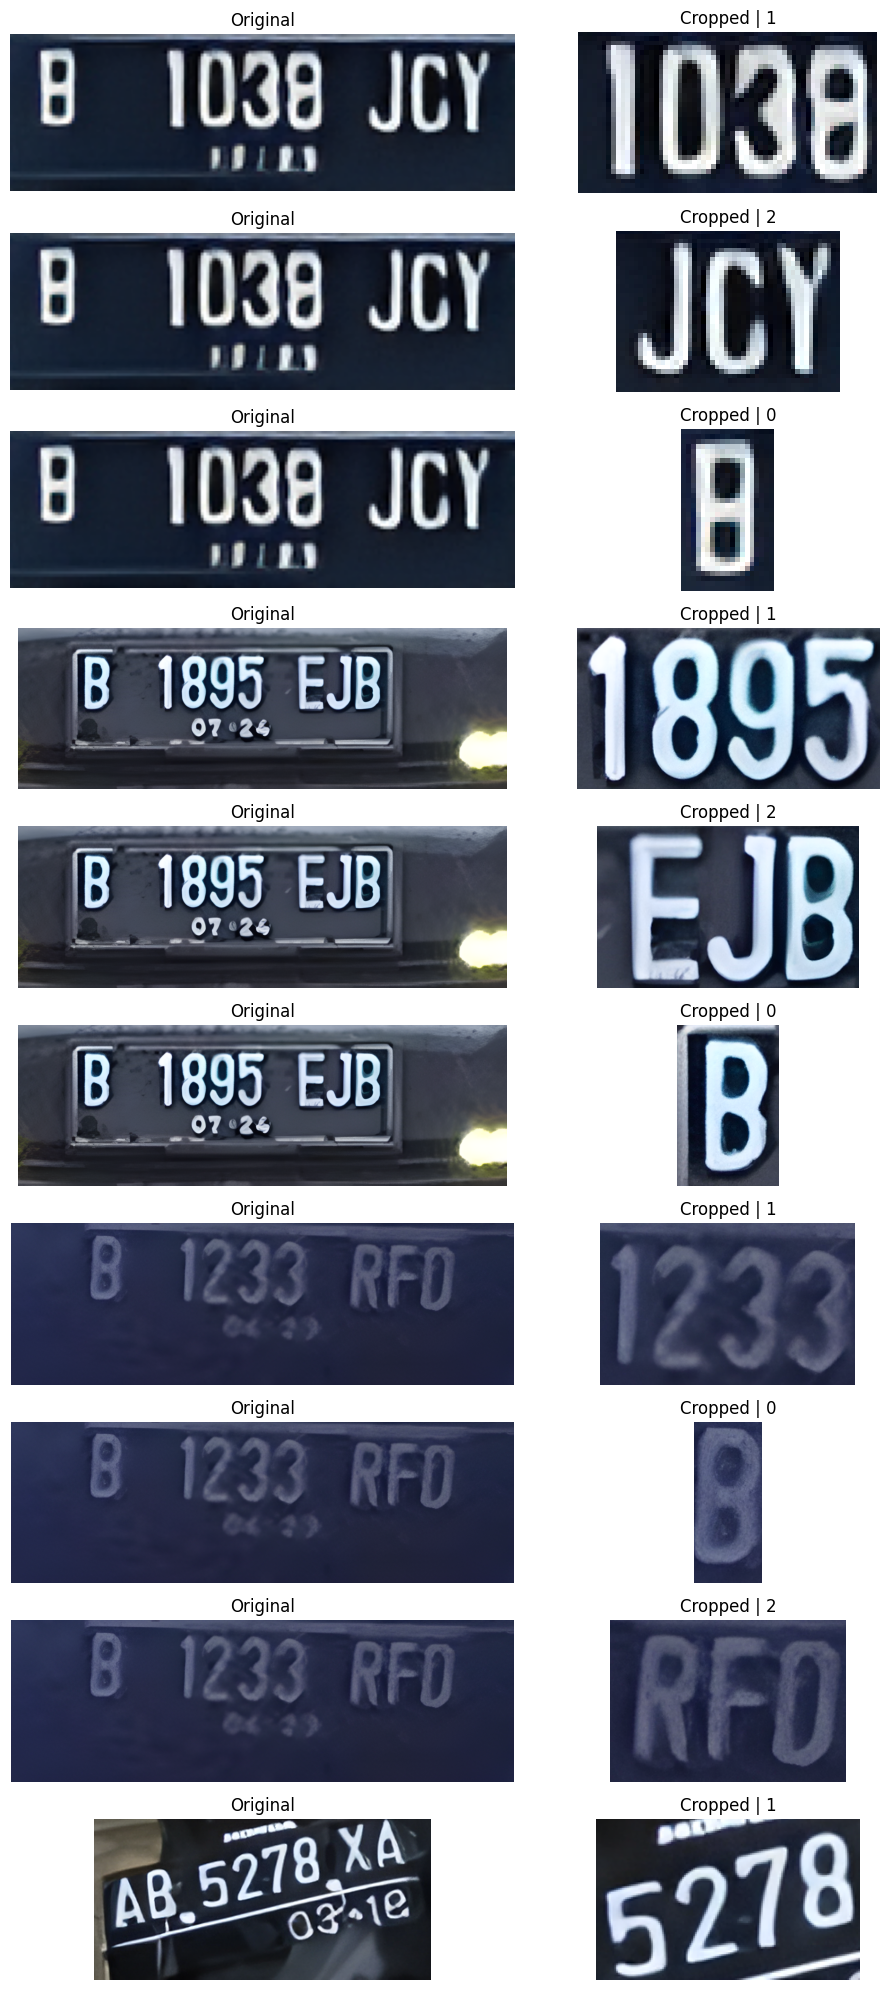

In [18]:
original_images_directory = '/content/drive/MyDrive/Yolov8-LicensePlate/bg udh bg/eval_set_highreso'
cropped_images_directory = '/content/drive/MyDrive/Yolov8-LicensePlate/output_predict/cropped_images_5'

# Set the start and end index for plotting
start_index = 150
end_index = 160

# Create a figure with 10 rows and 2 columns
fig, axs = plt.subplots(end_index - start_index, 2, figsize=(10, 2 * (end_index - start_index)))

# Iterate over the rows and columns to plot the images
for i, row in cropped_data.iloc[start_index:end_index].iterrows():
    # Load and plot the original image
    original_path = os.path.join(original_images_directory, row['OgFilename'])
    original_image = Image.open(original_path)
    axs[i - start_index, 0].imshow(original_image)
    axs[i - start_index, 0].axis('off')
    axs[i - start_index, 0].set_title('Original')

    # Load and plot the cropped image
    cropped_path = os.path.join(cropped_images_directory, row['CroppedFilename'])
    cropped_image = Image.open(cropped_path)
    cls = row['class']
    axs[i - start_index, 1].imshow(cropped_image)
    axs[i - start_index, 1].axis('off')
    axs[i - start_index, 1].set_title(f'Cropped | {cls}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Recognize Using PaddleOCR

In [19]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git
%cd PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 46885, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 46885 (delta 61), reused 88 (delta 44), pack-reused 46754
Receiving objects: 100% (46885/46885), 343.20 MiB | 32.26 MiB/s, done.
Resolving deltas: 100% (32925/32925), done.
/content/PaddleOCR


In [20]:
!pip install -r /content/PaddleOCR/requirements.txt -q

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [27]:
import paddleocr

Error: Can not import paddle core while this file exists: /usr/local/lib/python3.10/dist-packages/paddle/fluid/libpaddle.so


ImportError: ignored

In [23]:
cropped_data.head(1)

,OgFilename,CroppedFilename,class
0,DataTest10.png,DataTest10_1.png,2


In [24]:
# Specify the path to the model directory
model_dir = '/content/drive/MyDrive/Yolov8-LicensePlate/PaddleOCR/third_model'

# Create an instance of the OCR class with our trained model
ocr = paddleocr.PaddleOCR(lang='en', use_gpu=True, use_angle_cls=True, use_space_char=False, model_dir=model_dir)

NameError: ignored

In [ ]:
def extract_text(result):
  return result[0][0][1][0]

In [ ]:
cropped_data['text_result'] = np.nan
cropped_data.head()

### Test 1 image

In [ ]:
# Specify the path to the image file
images = "/content/drive/MyDrive/Yolov8-LicensePlate/output_predict/cropped_images_5/DataTest7_1.png"

# Perform OCR on the image
result = ocr.ocr(images )
print(len(result[0]))
print(extract_text(result))

img = mpimg.imread(images)
plt.imshow(img)
plt.axis('off')  # Turn off the axis labels
plt.show()

In [ ]:
# Recognize it
base_dir = '/content/drive/MyDrive/Yolov8-LicensePlate/output_predict/cropped_images_5/'
for i, row in cropped_data.iterrows():
  image_path = base_dir + row['CroppedFilename']
  # Perform OCR on the image
  try:
    result = ocr.ocr(image_path)
    text = extract_text(result)
    cropped_data.at[i, 'text_result'] = text
  except:
      continue

In [ ]:
recog_successful = cropped_data[~cropped_data.isna().any(axis=1)].reset_index().drop(columns = 'index')

In [ ]:
recog_successful.head()

In [ ]:
len(recog_successful)

In [ ]:
original_images_directory = '/content/drive/MyDrive/Yolov8-LicensePlate/bg udh bg/eval_set_highreso'
cropped_images_directory = '/content/drive/MyDrive/Yolov8-LicensePlate/output_predict/cropped_images_5'

# Set the start and end index for plotting
start_index = 20
end_index = 30

# Create a figure with 10 rows and 2 columns
fig, axs = plt.subplots(end_index - start_index, 2, figsize=(10, 2 * (end_index - start_index)))

# Iterate over the rows and columns to plot the images
for i, row in recog_successful.iloc[start_index:end_index].iterrows():
    # Load and plot the original image
    original_path = os.path.join(original_images_directory, row['OgFilename'])
    original_image = Image.open(original_path)
    axs[i - start_index, 0].imshow(original_image)
    axs[i - start_index, 0].axis('off')
    axs[i - start_index, 0].set_title('Original')

    # Load and plot the cropped image
    cropped_path = os.path.join(cropped_images_directory, row['CroppedFilename'])
    cropped_image = Image.open(cropped_path)
    axs[i - start_index, 1].imshow(cropped_image)
    axs[i - start_index, 1].axis('off')
    axs[i - start_index, 1].set_title('Cropped')

    # Display the text_result below the title
    axs[i - start_index, 1].text(0.5, -0.15, row['text_result'], transform=axs[i - start_index, 1].transAxes,
                                fontsize=10, ha='center')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Keras OCR

In [ ]:
!pip install keras-ocr -q

In [ ]:
import keras_ocr

In [ ]:
cropped_data['kerasocr_result'] = np.nan
cropped_data.head()

In [ ]:
recognizer = keras_ocr.recognition.Recognizer()

In [ ]:
image = "/content/drive/MyDrive/Yolov8-LicensePlate/output_predict/cropped_images_5/DataTest30_1.png"
result = recognizer.recognize(image)
img = mpimg.imread(image)
plt.imshow(img)
plt.axis('off')  # Turn off the axis labels
plt.title(result)
plt.show()

In [ ]:
# Recognize it
base_dir = '/content/drive/MyDrive/Yolov8-LicensePlate/output_predict/cropped_images_5/'
for i, row in cropped_data.iterrows():
  image_path = base_dir + row['CroppedFilename']
  # Perform OCR on the image
  result = recognizer.recognize(image_path)
  if result != '':
    cropped_data.at[i, 'kerasocr_result'] = result
  else:
    continue

In [ ]:
keras_ocr_successfull_result = cropped_data[~cropped_data['kerasocr_result'].isna()].reset_index().drop(columns = 'index')

In [ ]:
cropped_data.head()

In [ ]:
len(keras_ocr_successfull_result)

In [ ]:
def plot_cropped_images(df, start_index, final_index):
    cropped_images_directory = '/content/drive/MyDrive/Yolov8-LicensePlate/output_predict/cropped_images_5'
    num_images = final_index - start_index + 1
    num_rows = min(num_images, 5)
    num_cols = min(num_images, 5)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    axes = axes.flatten()

    for i, row in df.iloc[start_index:final_index + 1].iterrows():
        cropped_path = os.path.join(cropped_images_directory, row['CroppedFilename'])
        cropped_image = Image.open(cropped_path)
        paddle_result = row['text_result']
        keras_ocr = row['kerasocr_result']
        axes[i - start_index].imshow(cropped_image)
        axes[i - start_index].axis('off')
        axes[i - start_index].set_title(f'{paddle_result} | {keras_ocr}')

    # If the number of images is less than 5x5, remove the remaining subplots
    for j in range(num_images, num_rows*num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [ ]:
df = cropped_data  # Replace with your actual DataFrame

start_index = 50  # Start index of images to plot
final_index = 74  # Final index of images to plot

plot_cropped_images(df, start_index, final_index)

# Final Result

In [ ]:
cropped_data.head(10)

In [ ]:
cropped_data['result'] = np.where(
    (cropped_data['text_result'].notnull()) &
    (cropped_data['text_result'].str.isalnum()) &
    (cropped_data['kerasocr_result'] != 'b'),
    cropped_data['text_result'],
    cropped_data['kerasocr_result']
)

In [ ]:
cropped_data.head(10)

In [ ]:
# Delete rows with class 1
# cropped_data_del1 = cropped_data[cropped_data['class'] != 1]

In [ ]:
# # Sort the DataFrame by 'class' column in ascending order
# df_sorted = cropped_data_del1.sort_values('class')

# # Group the 'result' values by 'OgFilename' and concatenate them
# combined_labels = df_sorted.groupby('OgFilename')['result'].apply(''.join).reset_index()

# # Create the 'label' column by combining 'OgFilename' and the combined labels
# combined_labels['label'] = combined_labels['result']

# # Select the 'OgFilename' and 'label' columns in the final DataFrame
# final_df = combined_labels[['OgFilename', 'label']]

In [ ]:
# final_df.label = final_df.label.str.upper()
# final_df.head()

In [ ]:
# final_df.to_csv('/content/drive/MyDrive/Yolov8-LicensePlate/model4bbox.csv')

In [ ]:
# Sort the DataFrame by 'class' column in ascending order
df_sorted = cropped_data.sort_values('class')

# Group the 'result' values by 'OgFilename' and concatenate them
combined_labels = df_sorted.groupby('OgFilename')['result'].apply(''.join).reset_index()

# Create the 'label' column by combining 'OgFilename' and the combined labels
combined_labels['label'] = combined_labels['result']

# Select the 'OgFilename' and 'label' columns in the final DataFrame
final_df = combined_labels[['OgFilename', 'label']]

In [ ]:
final_df.label = final_df.label.str.upper()
final_df.head()


# Add the result into The Submission Format

In [ ]:
datatest = pd.read_csv('/content/drive/MyDrive/Yolov8-LicensePlate/bg udh bg/eval_set/DataTest.csv', sep = ";", index_col = 0)
datatest.head()

In [ ]:
# Merge final_df with datatest based on 'OgFilename' and 'Name of File'
merged_df = datatest.merge(final_df, left_on='Name of File', right_on='OgFilename', how='left')

# Select the 'Name of File' and 'label' columns from the merged DataFrame
result_df = merged_df[['Name of File', 'label']]
result_df.columns = [['Name of File', 'Vehicleregistrationplatebymodel']]

# Take a look of the result
result_df.head()

In [ ]:
result_df.to_csv('/content/drive/MyDrive/Yolov8-LicensePlate/submission.csv')

# merge two df from two model

In [ ]:
import pandas as pd

# Read the dataset submission.csv
submission_df = pd.read_csv('/content/drive/MyDrive/Yolov8-LicensePlate/submission.csv')

# Read the final_df dataframe
final_df = pd.read_csv('/content/drive/MyDrive/Yolov8-LicensePlate/model4bbox.csv')

# Merge the two dataframes based on the 'Name of File' column
combined_df = final_df.merge(submission_df, left_on='OgFilename', right_on='Name of File', how='left')

# Select the desired columns
combined_df = combined_df[['OgFilename', 'Vehicleregistrationplatebymodel', 'label']]

# Rename the columns
combined_df.columns = ['filename', 'model_3bbox', 'model_4bbox']

# Display the combined dataframe
print(combined_df)


In [ ]:
combined_df.to_csv('/content/drive/MyDrive/Yolov8-LicensePlate/compare_model.csv')